In [ ]:
# work on cleaning the Location column, observe that there are values like ON

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("Ontario_Campsite_Data.csv")

In [82]:
df

,Name,Rating,Price,Type,Location
0,Harrowsmith Brewing Co.,97%,CA$40,"RVs, Tents","Kingston, ON"
1,Villa Vida Loca,100%,CA$150,Lodging,"Brock, ON"
2,Off Grid Forest Retreat,93%,CA$40,"Lodging, Tents, RVs","Machar, ON"
3,Moose Cabin At Trailhead Cabins,100%,CA$120,Lodging,"Burk's Falls, ON"
4,Casa de Campo,95%,CA$95,Lodging,"Norwood, ON"
...,...,...,...,...,...
612,Phantom island,NaN,CA$100,Tents,"Lynden, ON"
613,Glamping Tent in the Pine Forest,NaN,CA$150,Lodging,"Minden, ON"
614,A cozy cabin for wilderness escape,NaN,CA$160,Lodging,"Orangeville, ON"
615,The Pfisterer Farm,NaN,CA$200,Tents,"Owen Sound, ON"


In [83]:
# replace ? entry with NaN values
df.replace("?", np.nan, inplace = True)

In [90]:
# display the information of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      617 non-null    object
 1   Rating    470 non-null    object
 2   Price     617 non-null    object
 3   Type      617 non-null    object
 4   Location  616 non-null    object
dtypes: object(5)
memory usage: 24.2+ KB
None


In [101]:
# Remove "CA$" and convert to int
df['Price'] = df['Price'].str.replace('CA$', '', regex=True)

In [103]:
# Convert the data type of Price from object to float
df['Price'] = df['Price'].astype(float)

,Name,Rating,Price,Type,Location
0,Harrowsmith Brewing Co.,97%,40.0,"RVs, Tents","Kingston, ON"
1,Villa Vida Loca,100%,150.0,Lodging,"Brock, ON"
2,Off Grid Forest Retreat,93%,40.0,"Lodging, Tents, RVs","Machar, ON"
3,Moose Cabin At Trailhead Cabins,100%,120.0,Lodging,"Burk's Falls, ON"
4,Casa de Campo,95%,95.0,Lodging,"Norwood, ON"
...,...,...,...,...,...
612,Phantom island,NaN,100.0,Tents,"Lynden, ON"
613,Glamping Tent in the Pine Forest,NaN,150.0,Lodging,"Minden, ON"
614,A cozy cabin for wilderness escape,NaN,160.0,Lodging,"Orangeville, ON"
615,The Pfisterer Farm,NaN,200.0,Tents,"Owen Sound, ON"


In [104]:
# Convert the data type of Rating from object to float
df['Rating'] = df['Rating'].str.replace('%', '', regex=True)
df['Rating'] = df['Rating'].astype(float)

In [115]:
# Counts the number of NaN entries of each column
nan_counts = df.isna().sum()
nan_counts

Name        0
Rating      0
Price       0
Type        0
Location    0
dtype: int64

In [106]:
# Calculates the mean of rating and replace all NaN entries with mean
avg_rating = df['Rating'].mean()
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [114]:
# Drop all rows with any NaN values
df = df.dropna()

In [118]:
# Replace entries that only contain 'ON' with NaN
df.loc[:, 'Location'] = df['Location'].apply(lambda x: np.nan if x.strip() == 'ON' else x)

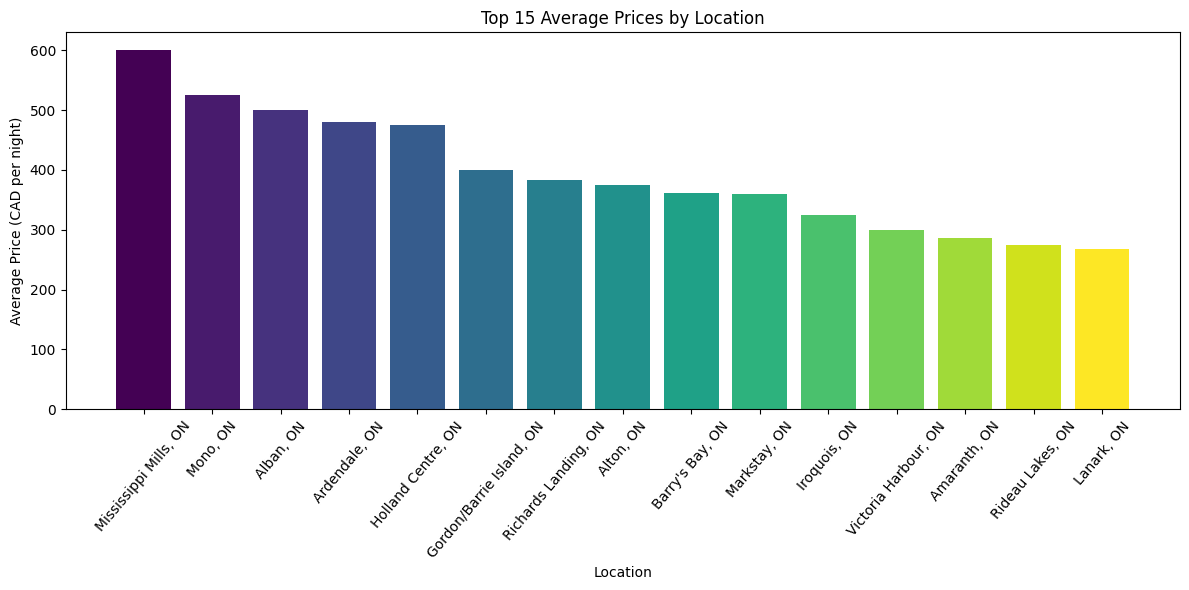

In [119]:
# plot the graph of relationship between camping price and location
# Group by location and calculate the mean price, then sort and get the top 10
top_locations = df.groupby('Location')['Price'].mean().sort_values(ascending=False).head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_locations)))

# Create a bar chart for the top 10 locations by average price
plt.figure(figsize=(12, 6))
plt.bar(top_locations.index, top_locations.values, color = colors)
plt.title('Top 15 Average Prices by Location')
plt.xlabel('Location')
plt.ylabel('Average Price (CAD per night)')
plt.xticks(rotation=50)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping

# Display the plot
plt.show()

In [120]:
# Standardize the 'type of encampment' column
df.loc[:, 'Type'] = df['Type'].apply(lambda x: ', '.join(sorted(x.split(', '))))

# Check the updated unique values to confirm standardization
print(df['Type'].unique())

['RVs, Tents' 'Lodging' 'Lodging, RVs, Tents' 'Lodging, Tents' 'Tents'
 'RVs' 'Lodging, RVs']


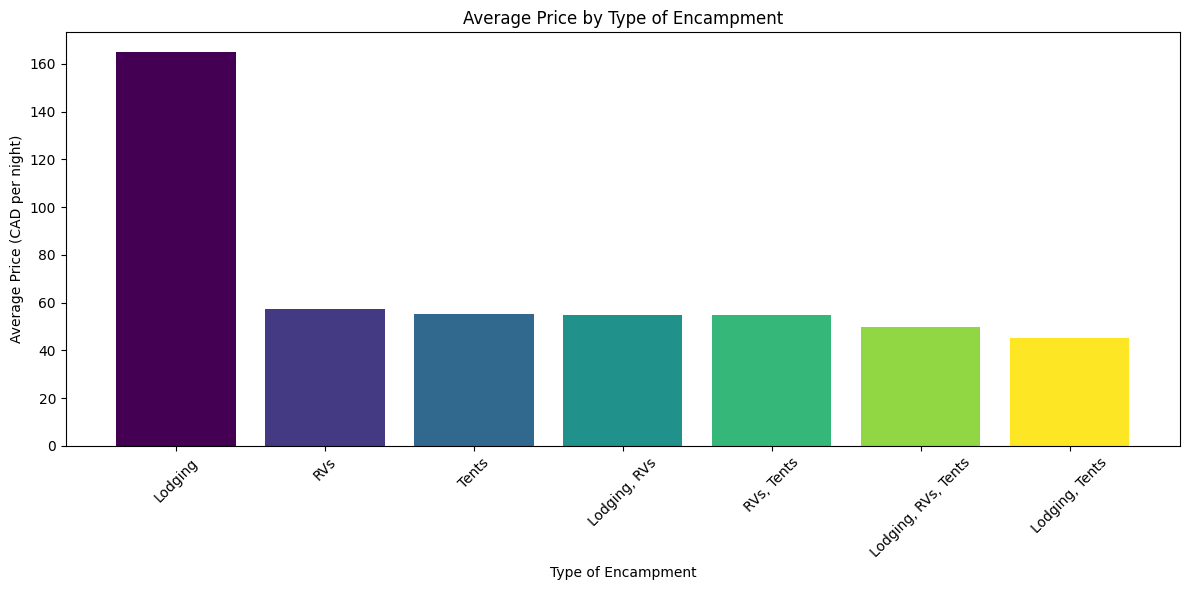

In [121]:
# plot the graph of relationship between price and type of encampment
price_by_type = df.groupby('Type')['Price'].mean().sort_values(ascending=False)
colors = plt.cm.viridis(np.linspace(0, 1, len(price_by_type)))

plt.figure(figsize=(12,6))
plt.bar(price_by_type.index, price_by_type.values, color = colors)
plt.title('Average Price by Type of Encampment')
plt.xlabel('Type of Encampment')
plt.ylabel('Average Price (CAD per night)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping

# Display the plot
plt.show()

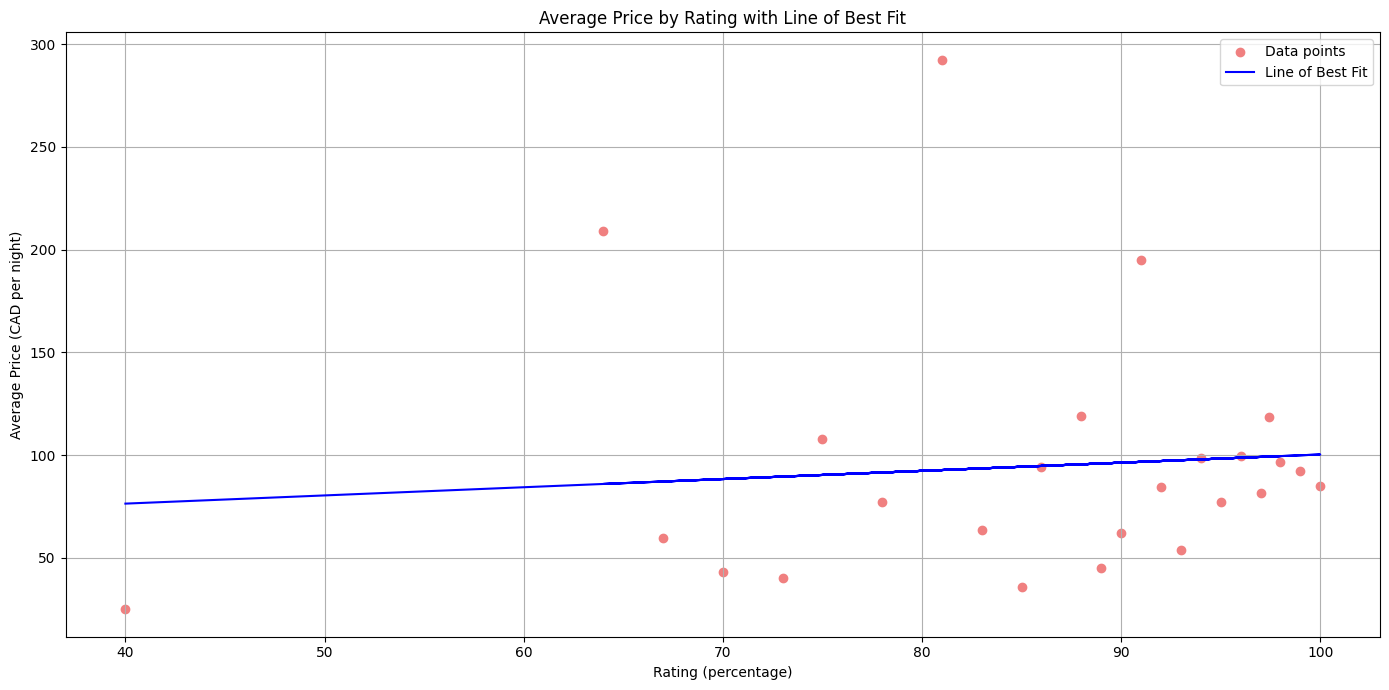

In [72]:
# Create a graph of average price by rating
price_by_rating = df.groupby('Rating')['Price'].mean().sort_values(ascending=False)

# Assuming price_by_rating.index and price_by_rating.values are numerical
x = price_by_rating.index
y = price_by_rating.values

# Calculate the coefficients for the line of best fit
coefficients = np.polyfit(x, y, 1)  # Linear fit (degree 1)
polynomial = np.poly1d(coefficients)

# Generate y-values for the line of best fit
y_line = polynomial(x)

plt.figure(figsize=(14, 7))
plt.scatter(x, y, color='lightcoral', label='Data points')
plt.plot(x, y_line, color='blue', label='Line of Best Fit')
plt.title('Average Price by Rating with Line of Best Fit')
plt.xlabel('Rating (percentage)')
plt.ylabel('Average Price (CAD per night)')
plt.grid(True)  # Add grid for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to avoid clipping

# Display the plot
plt.show()

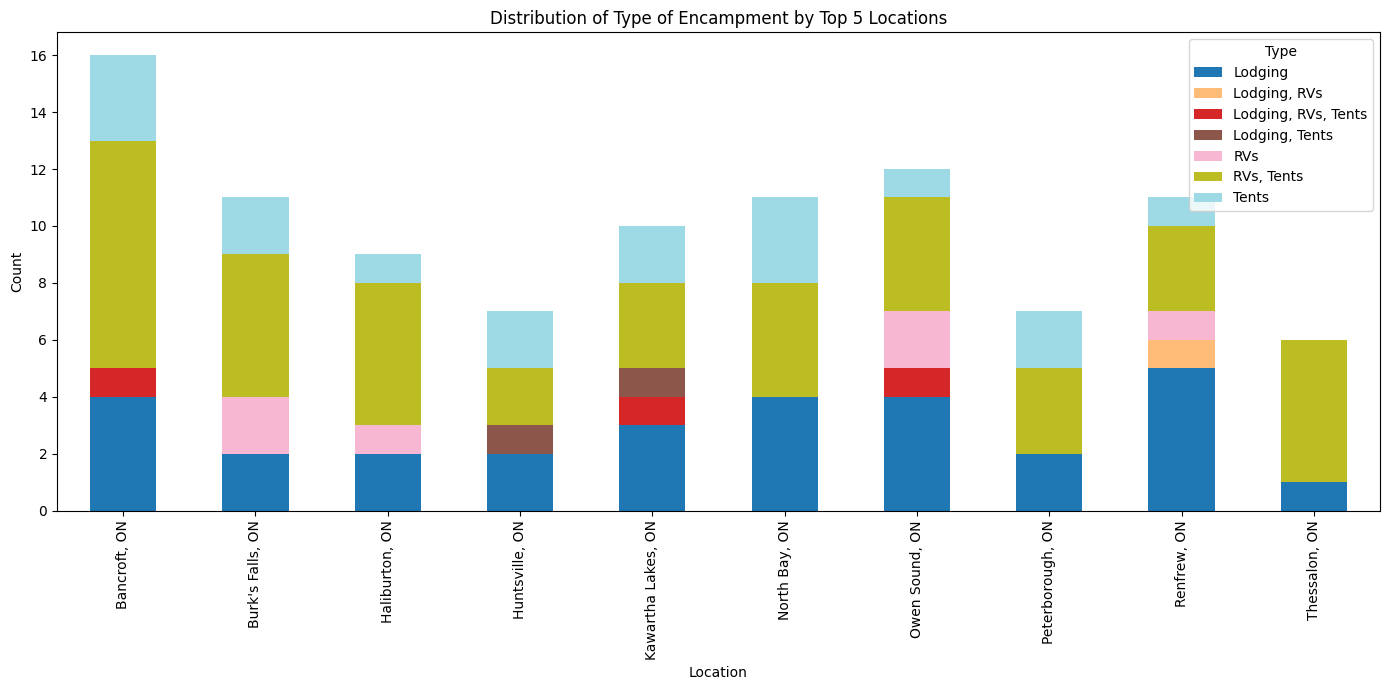

In [122]:
# Get the top 10 locations based on the count of occurrences
top_locations = df['Location'].value_counts().head(10).index

# Filter the DataFrame to include only rows with the top 10 locations
filtered_df = df[df['Location'].isin(top_locations)]

# Create a crosstab for the filtered data
crosstab = pd.crosstab(filtered_df['Location'], filtered_df['Type'])

# Plot a stacked bar chart for the filtered data
crosstab.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Distribution of Type of Encampment by Top 5 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()